In [1]:
import sklearn
import pandas as pd

# 读取数据和处理数据



获取数据路径列表

In [2]:
import os 
filePath = 'D:\\emg_data\\20201103\\YCH\\featureData\\' 
dir_paths=os.listdir(filePath)

In [3]:
dir_paths

['EMG19_31_33_five_1.txt',
 'EMG19_31_33_five_2.txt',
 'EMG19_31_33_five_3.txt',
 'EMG19_31_33_good_1.txt',
 'EMG19_31_33_good_2.txt',
 'EMG19_31_33_good_3.txt',
 'EMG19_31_33_one_1.txt',
 'EMG19_31_33_one_2.txt',
 'EMG19_31_33_one_3.txt',
 'EMG19_31_33_six_1.txt',
 'EMG19_31_33_six_2.txt',
 'EMG19_31_33_six_3.txt',
 'EMG19_31_33_ten_1.txt',
 'EMG19_31_33_ten_2.txt',
 'EMG19_31_33_ten_3.txt',
 'EMG19_31_33_three_1.txt',
 'EMG19_31_33_three_2.txt',
 'EMG19_31_33_three_3.txt']

删除txt文件的第一段

In [3]:
#注意！！！！
#这一段用一次后以后就再也用不着了，用处是就是删除txt文件第一行的
for dir_path in (dir_paths):

    
    with open(filePath+dir_path,"r") as f:
        lines = f.readlines()
    with open(filePath+dir_path,"w",encoding="utf-8") as f_w:
        for line in lines:
            if "征窗宽度" in line:
                continue
            f_w.write(line)
    
    

0 EMG19_31_33_five_1.txt
1 EMG19_31_33_five_2.txt
2 EMG19_31_33_five_3.txt
3 EMG19_31_33_good_1.txt
4 EMG19_31_33_good_2.txt
5 EMG19_31_33_good_3.txt
6 EMG19_31_33_one_1.txt
7 EMG19_31_33_one_2.txt
8 EMG19_31_33_one_3.txt
9 EMG19_31_33_six_1.txt
10 EMG19_31_33_six_2.txt
11 EMG19_31_33_six_3.txt
12 EMG19_31_33_ten_1.txt
13 EMG19_31_33_ten_2.txt
14 EMG19_31_33_ten_3.txt
15 EMG19_31_33_three_1.txt
16 EMG19_31_33_three_2.txt
17 EMG19_31_33_three_3.txt


把多个txt文件读进dataframe，然后合并

In [4]:
map_dic={'five':5,'good':2,'one':1,'six':6,'ten':10,'three':3}
data_dic={}
for i,dir_path in enumerate(dir_paths):
    data_dic[i]=pd.read_csv(filePath+dir_path,sep='\s+')
    data_dic[i]['label']=map_dic[dir_path[12:(12+(dir_path[12:].index('_')))]]

data_train=pd.concat([data_dic[i] for i in data_dic.keys()],axis=0,join='inner') 

打乱顺序

In [6]:
from sklearn.utils import shuffle
data_raw = shuffle(data_train)
x=data_raw.iloc[:,:-1]                    #此时x，y还是dataframe
y=data_raw.iloc[:,-1]
train=x.values
target=y.values

# 用不同的分类模型验证
随机森林

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf_RFC=RandomForestClassifier(n_estimators=50
                             ,max_depth=2
                             ,random_state=0
                             ,n_jobs=-1
                             )
score_RFC=cross_val_score(clf_RFC,x,y,cv=5)
print(score_RFC)



D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.88461538 0.8988604  0.90883191 0.89316239 0.8974359 ]


使用logicalRegression

In [146]:
train=data_raw.iloc[:,1:-1]
target=data_raw.iloc[:,-1]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
stdScaler=StandardScaler()
X=stdScaler.fit_transform(train)
X_train,X_test,y_train,y_test=train_test_split(train,target)
clf=LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)
clf.score(X_test,y_test)

0.989749430523918

K近邻

confusion matirx without nomalization
[[115   0   1   1   0   0]
 [  0 115   0   1   1   0]
 [  1   0 115   1   0   0]
 [  0   0   0 117   0   0]
 [  0   0   0   0 117   0]
 [  0   0   0   0   0 117]]
Normalize confusion matirx
[[0.983 0.    0.009 0.009 0.    0.   ]
 [0.    0.983 0.    0.009 0.009 0.   ]
 [0.009 0.    0.983 0.009 0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]


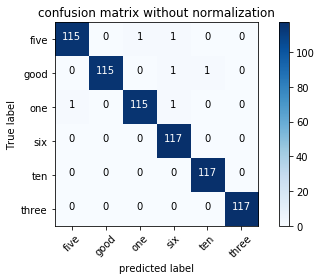

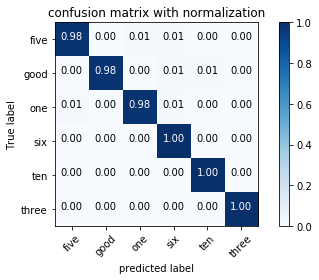

In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred=clf_knn.predict(X_test)
clf_knn.score(X_test,y_test)

#画混淆矩阵
#compute confusion matrix
cnf_matrix=confusion_matrix(y_test,y_pred)

#plot non-normalized confusion matirx
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names
                     ,title='confusion matrix without normalization')
#plot normalized confusion matirx
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names
                      ,normalize=True
                     ,title='confusion matrix with normalization') 
plt.show()

In [19]:
from sklearn.model_selection import StratifiedKFold

spt = StratifiedKFold(n_splits=5, random_state=42)
for k,(train_index, test_index) in enumerate(spt.split(train, target)):
    X_train,X_test,y_train,y_test=train[train_index],train[test_index],target[train_index],target[test_index]
    clf_RFC=clf_RFC.fit(X_train,y_train)
    print(k,clf_RFC.score(X_test,y_test))
    cnf_matrix=confusion_matrix(y_test,clf_RFC.predict(X_test))
    

0 0.8846153846153846
1 0.8988603988603988
2 0.9088319088319088
3 0.8931623931623932
4 0.8974358974358975


In [20]:
cnf_matrix

array([[115,   0,   1,   0,   0,   1],
       [  0,  80,   0,   3,  33,   1],
       [  4,   0,  92,  21,   0,   0],
       [  0,   0,   5, 112,   0,   0],
       [  0,   0,   0,   0, 114,   3],
       [  0,   0,   0,   0,   0, 117]], dtype=int64)

# 混淆矩阵
这是画出混淆矩阵热力图的通用函数


In [58]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


class_names=list(map_dic.keys())
np.set_printoptions(precision=3)


def plot_confusion_matrix(cm
                          ,classes
                          ,normalize=False
                         ,title='confusion matirx'
                         ,cmap=plt.cm.Blues
                         ):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalize confusion matirx')
        
    else:
        print('confusion matirx without nomalization')
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j
                ,i
                ,format(cm[i,j],fmt)
                ,horizontalalignment='center'
                ,color='white' if cm[i,j]>thresh else 'black')
        plt.ylabel('True label')
        plt.xlabel('predicted label')
        plt.tight_layout()
        
        
        



In [27]:
sum(y_pred==1)

116

# 模型调参


通用的网格化搜索训练模型

In [55]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
def train_model(model,param_grid=[],X=[],y=[],splits=5,repeats=5):
    skfold = RepeatedStratifiedKFold(n_splits=splits,n_repeats=repeats)

    gsearch=GridSearchCV(model
                        ,param_grid
                        ,cv=skfold
                        ,scoring='f1_macro'                     #这里的是用于分类问题的,其他的根据具体情况选
                        ,verbose=1
                        ,return_train_score=True
                        )
    gsearch.fit(X,y)
    model=gsearch.best_estimator_
    best_idx=gsearch.best_index_
    grid_results=pd.DataFrame(gsearch.cv_results_)
    
    
    return model,grid_results
opt_models=dict()
splits=5
repeats=5
    
    
    
        

Fitting 25 folds for each of 3 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   18.3s finished


confusion matirx without nomalization
[[151   0   0   0   0   0]
 [  0 128   0   1   0   0]
 [  1   0 154   0   0   0]
 [  1   1   0 139   0   0]
 [  0   0   0   0 156   0]
 [  0   0   0   0   0 146]]
Normalize confusion matirx
[[1.    0.    0.    0.    0.    0.   ]
 [0.    0.992 0.    0.008 0.    0.   ]
 [0.006 0.    0.994 0.    0.    0.   ]
 [0.007 0.007 0.    0.986 0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]


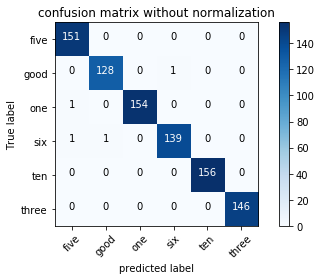

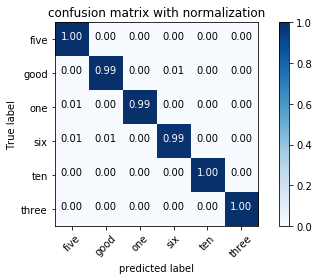

In [57]:
model='KNeighborsClassifier'
opt_models[model]=KNeighborsClassifier()
param_grid={'n_neighbors':[3,4,5]}
X_train,X_test,y_train,y_test=train_test_split(train,target,test_size=0.25)
opt_models[model],grid_results=train_model(opt_models[model],param_grid=param_grid,X=X_train,y=y_train
                                                    ,splits=splits,repeats=repeats)
y_pred=opt_models[model].predict(X_test)

#画混淆矩阵
#compute confusion matrix
cnf_matrix=confusion_matrix(y_test,y_pred)

#plot non-normalized confusion matirx
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names
                     ,title='confusion matrix without normalization')
#plot normalized confusion matirx
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names
                      ,normalize=True
                     ,title='confusion matrix with normalization') 
plt.show()

In [48]:
opt_models[model].

{'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform')}

In [49]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,0.013311,0.001037,0.066362,0.003343,3,{'n_neighbors': 3},0.991465,0.995733,0.995732,0.995726,...,0.997507,0.997508,0.997863,0.997863,0.997863,0.998219,0.997507,0.997152,0.997749,0.000373
1,0.012974,0.000491,0.071025,0.004882,4,{'n_neighbors': 4},0.985733,0.997151,0.992895,0.994296,...,0.997864,0.995371,0.997150,0.997152,0.996083,0.996440,0.997151,0.994657,0.996781,0.000750
2,0.012997,0.000389,0.073812,0.002703,5,{'n_neighbors': 5},0.985753,0.998575,0.990034,0.997151,...,0.995365,0.996084,0.996796,0.994655,0.995372,0.994657,0.996080,0.993944,0.995184,0.000919
